In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

In [20]:
boston = load_boston()

In [4]:
data = boston.data
target = boston.target
feature_names = boston.feature_names

In [5]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [9]:
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = lr.predict(X_test)

In [11]:
check_test = pd.DataFrame({"y_test": y_test["price"],
                           "y_pred": y_pred.flatten()},
                         columns=["y_test", "y_pred"])

In [12]:
check_test.head(15)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


In [13]:
check_test["error"] = check_test["y_test"] - check_test['y_pred']

In [14]:
initian_mse = (check_test['error'] ** 2).mean()
initian_mse

21.517444231177386

In [15]:
from sklearn.metrics import mean_squared_error
initian_mse = mean_squared_error(y_test, y_pred)
initian_mse

21.517444231177386

In [16]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

3.162709871457423

In [17]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.6693702691495587

### Отсюда начинается просто повтор урока и просмотр возможностей

In [110]:
lr.intercept_

array([31.63108404])

In [111]:
lr.coef_

array([[-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,
         3.11983512e+00, -1.54170609e+01,  4.05719923e+00,
        -1.08208352e-02, -1.38599824e+00,  2.42727340e-01,
        -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
        -5.47113313e-01]])

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InLineBackend.figure_format = "svg"

Text(0, 0.5, 'Признак')

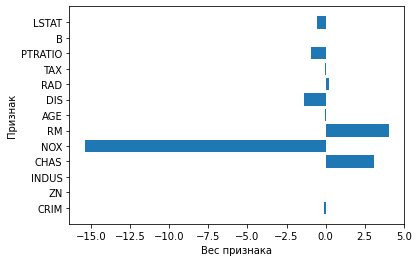

In [122]:
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel("Вес признака")
plt.ylabel("Признак")